In [1]:
import pandas as pd
from io import StringIO
from datetime import datetime

def read_dsc_txt(file_path):
    """ Reads the contents of a DSC/TGA txt from filepath, returns cleaned dataframe.

    Args:
        file_path (str): the path of the file
    Returns:
        df (Pandas.DataFrame): the cleaned dataframe of sample run data
        experiment_name (str): the experiment name
        completion_date (Datetime): the time/date of completion
    """

    lines = []

    # open the file with utf-16 encoding
    with open(file_path, 'r', encoding='utf-16') as infile:
        
        # skip the first line with a weird character
        next(infile)

        # remove the index part of each line -- pandas automatically inserts it
        lines = [line for line in infile]

    
    # get the sample info from the string at the bottom
    info = lines[-1].split(',')
    experiment_name = info[0]
    completion_date = datetime.strptime(info[1], " %d.%m.%Y %H:%M:%S\n")

    # remove whitespace
    lines = lines[1:-1]
    
    columns = ["Ts", "t", "HF", "Weight", "Tr"]

    # use .split() to get everything after index
    df = pd.DataFrame([line.split()[1:] for line in lines], columns=columns).astype(float)
   
    return df, experiment_name, completion_date


In [2]:

df, experiment_name, completion_date = read_dsc_txt('Feb_18_analysis/TEST_WEIGH_IN 20250213_174301_tabular.txt')
print(experiment_name)
print(completion_date)
df.tail()


TEST_WEIGH_IN
2025-02-15 18:12:06


,Ts,t,HF,Weight,Tr
1496,248.220,1496.0,-55.8640,14.5108,250.0
1497,248.223,1497.0,-55.8671,14.5107,250.0
1498,248.223,1498.0,-55.8702,14.5106,250.0
1499,248.230,1499.0,-55.8723,14.5104,250.0
1500,248.225,1500.0,-55.8751,14.5103,250.0


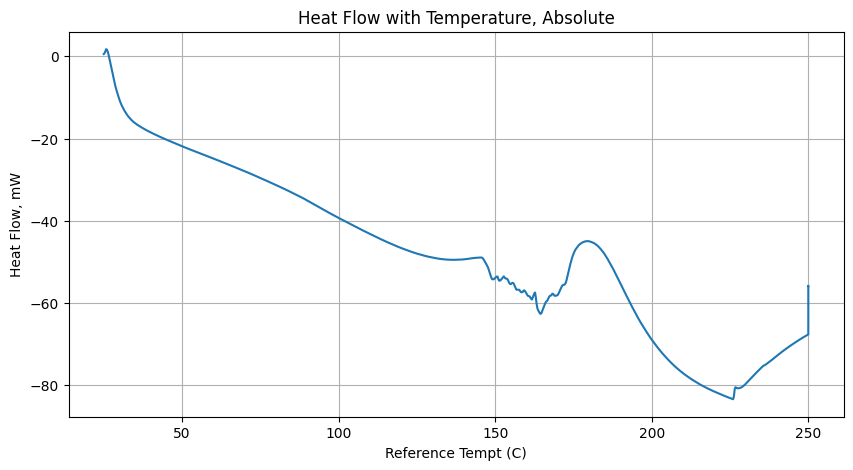

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(df['Tr'],df['HF'])

plt.xlabel("Reference Tempt (C)")
plt.ylabel("Heat Flow, mW")
plt.title("Heat Flow with Temperature, Absolute")
plt.grid(True)

plt.show()



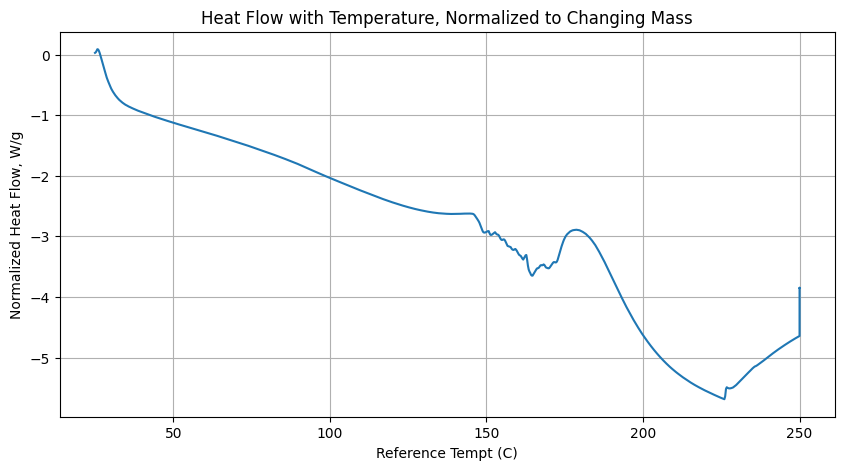

In [10]:

df['HF/g'] = df['HF']/df['Weight']

plt.figure(figsize=(10, 5))
plt.plot(df['Tr'],df['HF/g'])

plt.xlabel("Reference Tempt (C)")
plt.ylabel("Normalized Heat Flow, W/g")
plt.title("Heat Flow with Temperature, Normalized to Changing Mass")
plt.grid(True)

plt.show()

